In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install mtcnn
!pip install keras_vggface keras_applications

     |████████████████████████████████| 2.3 MB 23.7 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 


In [ ]:
# %env SM_FRAMEWORK=tf.keras
!pip install keras==2.4.3
# !pip install keras==2.3.1
!pip install tensorflow==2.4.1

  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.4.3 which is incompatible.
     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 2.9 MB 23.8 MB/s 
     |████████████████████████████████| 462 kB 52.2 MB/s 
     |████████████████████████████████| 132 kB 57.5 MB/s 
     |████████████████████████████████| 14.8 MB 43.9 MB/s 
     |████████████████████████████████| 3.8 MB 50.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=fb23146f63813517dea79dc88c7c2de9bf67550d1cd8

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
import tensorflow as tf
import tensorflow.python.keras.engine
from google.colab.patches import cv2_imshow
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)


In [ ]:
image =cv2.imread('/content/drive/MyDrive/projectdatas/12.jpeg')

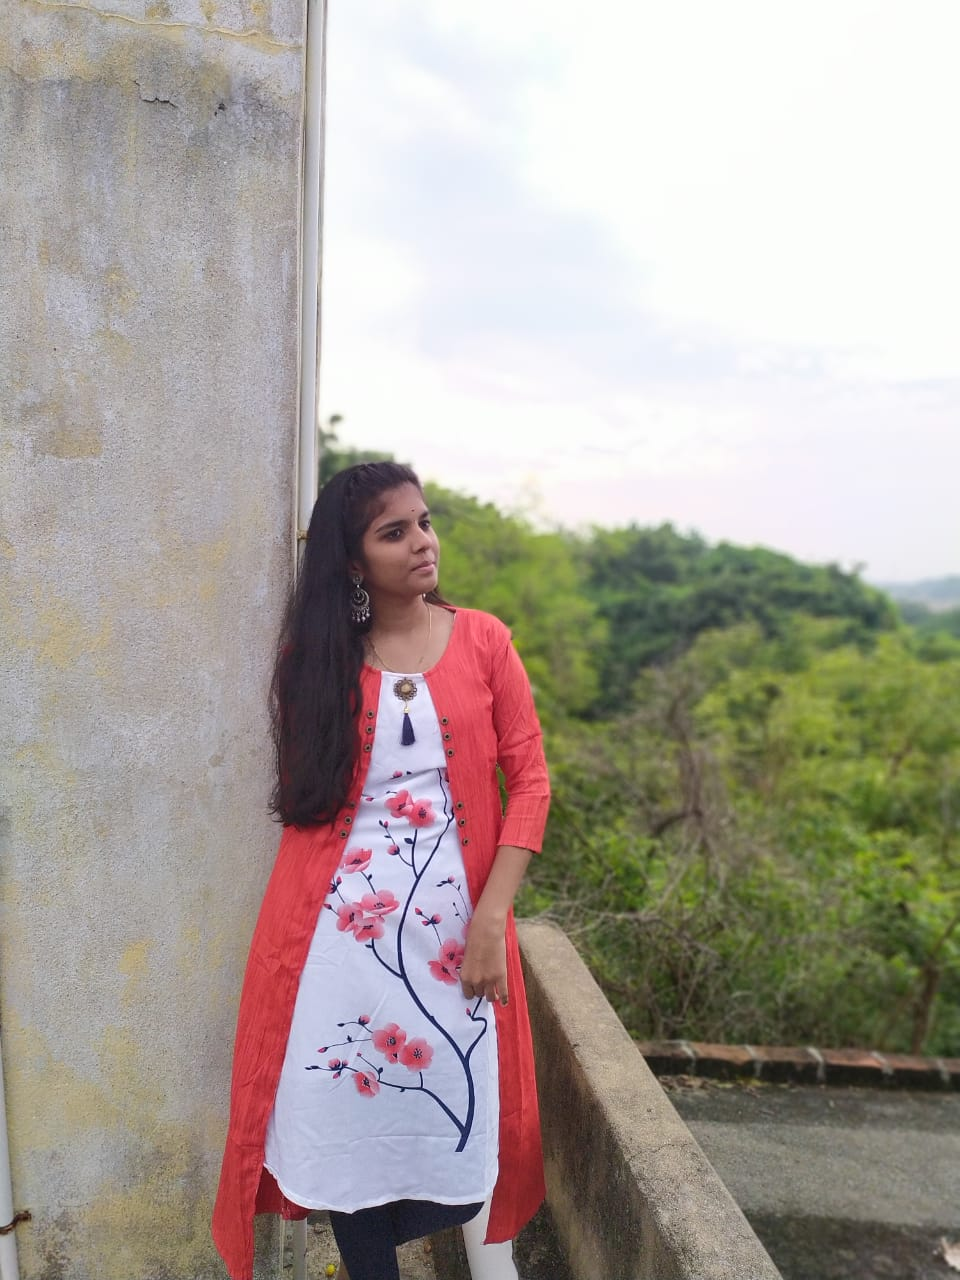

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image =cv2.imread('/content/drive/MyDrive/projectdatas/1.jpeg')

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
detector = MTCNN()
faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [424, 518, 62, 81], 'confidence': 0.9998779296875, 'keypoints': {'left_eye': (442, 553), 'right_eye': (473, 551), 'nose': (460, 571), 'mouth_left': (446, 582), 'mouth_right': (473, 580)}}


In [ ]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
              (bounding_box[0],bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1]+bounding_box[3]),
              (0,155,255),
              2)   
  cv2.circle(image,(keypoints['left_eye']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['right_eye']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['nose']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['mouth_left']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['mouth_right']),2,(0,155,255),2)

  return image

In [ ]:
marked_image = create_bbox(image)

In [ ]:
cv2_imshow(marked_image)

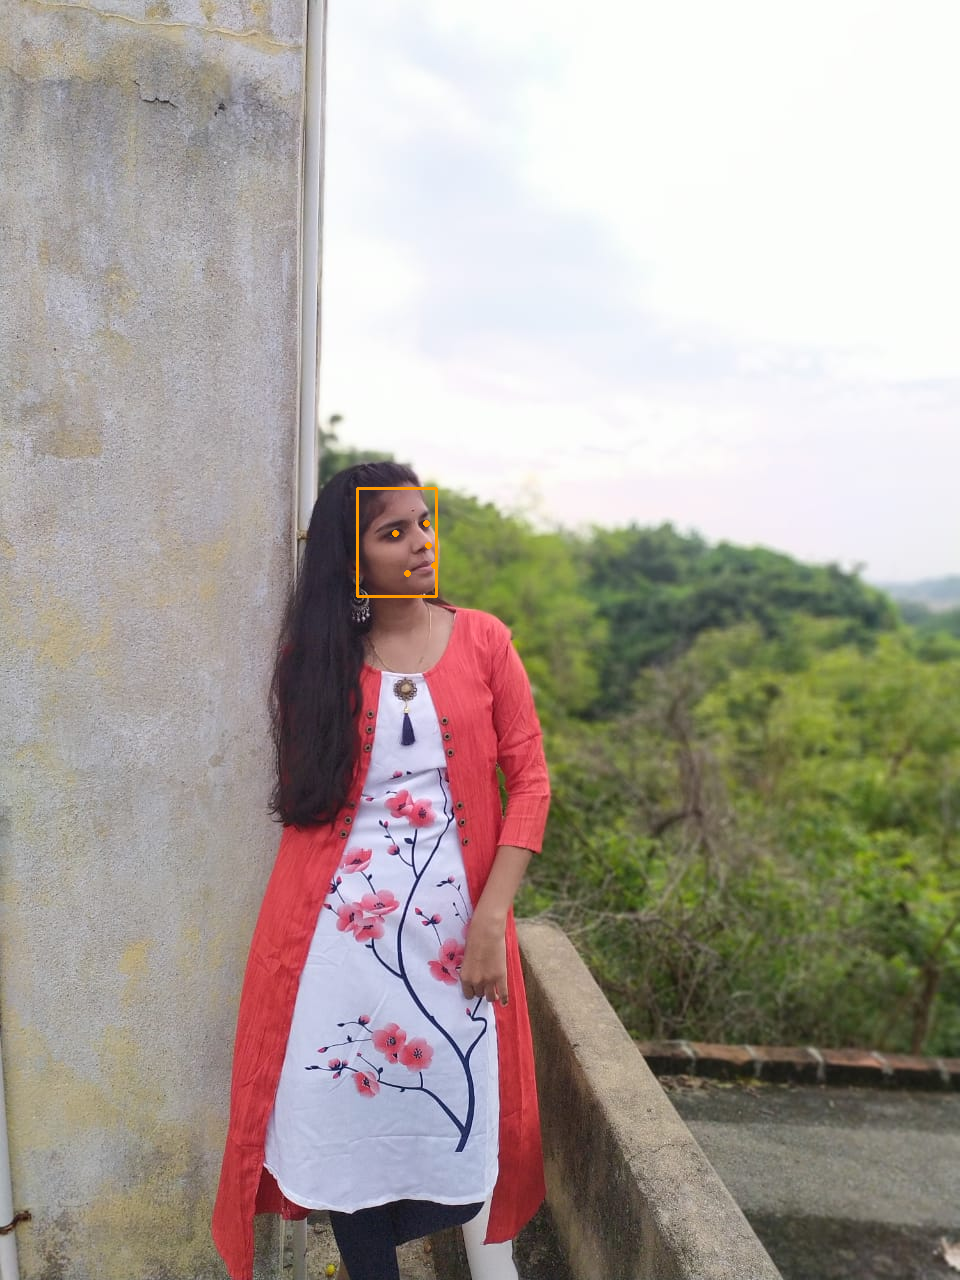

In [ ]:
marked_image = create_bbox(cv2.imread('/content/drive/MyDrive/projectdatas/12.jpeg'))
cv2_imshow(marked_image)

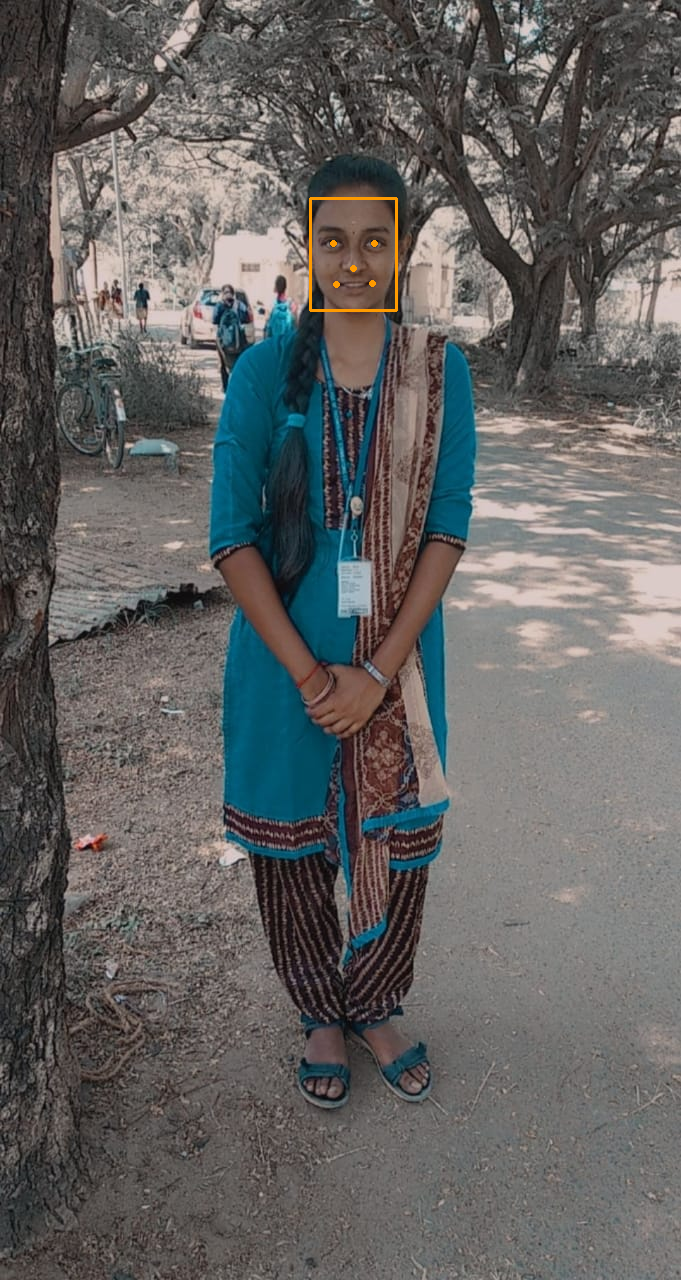

In [ ]:
marked_image = create_bbox(cv2.imread('/content/drive/MyDrive/projectdatas/10.jpeg'))
cv2_imshow(marked_image)

In [ ]:
def extract_face(image , resize=(224,224)):
  image=cv2.imread(image)

  faces=detector.detect_faces(image)
  x1,y1,width,height=faces[0]['box']
  x2,y2=x1+width, y1+height

  face_boundary =image[y1:y2,x1:x2]

  face_image=cv2.resize(face_boundary,resize)

  return face_image

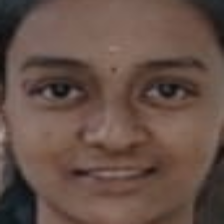

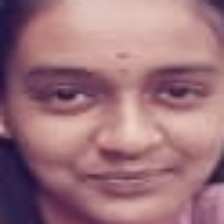

In [ ]:
face_image = extract_face('/content/drive/MyDrive/projectdatas/10.jpeg')
cv2_imshow(face_image)
face_image = extract_face('/content/drive/MyDrive/projectdatas/1.jpeg')
cv2_imshow(face_image)

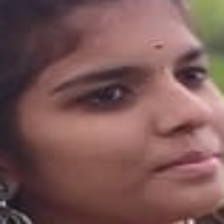

In [ ]:
face_image = extract_face('/content/drive/MyDrive/projectdatas/12.jpeg')
cv2_imshow(face_image)

In [ ]:
def get_embeddings(faces):
  face= np.asarray(faces,'float32')

  face= preprocess_input(face, version=1)

  model=VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

  return model.predict(face)

In [ ]:
def  get_similarity(faces):
  embeddings=get_embeddings(faces)

  score= cosine(embeddings[0], embeddings[1])

  if score <=0.5:
    return "Face Matched",score
  
  return "Face Not Matched",score

In [ ]:
faces=[extract_face(image) for image in ['/content/drive/MyDrive/projectdatas/1.jpeg','/content/drive/MyDrive/projectdatas/10.jpeg']]

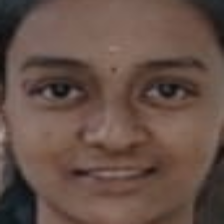

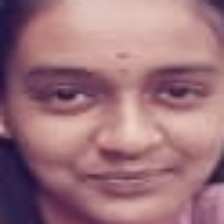

In [ ]:
face_image = extract_face('/content/drive/MyDrive/projectdatas/10.jpeg')
cv2_imshow(face_image)
face_image = extract_face('/content/drive/MyDrive/projectdatas/1.jpeg')
cv2_imshow(face_image)

In [ ]:
from tensorflow.python.framework import tensor_util
def is_tensor(x):                                                                                                                                                      
    return tensor_util.is_tensor(x)

get_similarity(faces)

94699520/94694792 [==============================] - 1s 0us/step


('Face Matched', 0.1339576244354248)

In [ ]:
faces=[extract_face(image) for image in ['/content/drive/MyDrive/projectdatas/1.jpeg','/content/drive/MyDrive/projectdatas/12.jpeg']]

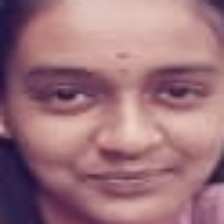

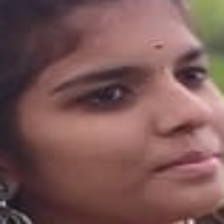

In [ ]:
face_image = extract_face('/content/drive/MyDrive/projectdatas/1.jpeg')
cv2_imshow(face_image)
face_image = extract_face('/content/drive/MyDrive/projectdatas/12.jpeg')
cv2_imshow(face_image)

In [ ]:
from tensorflow.python.framework import tensor_util
def is_tensor(x):                                                                                                                                                      
    return tensor_util.is_tensor(x)

get_similarity(faces)

('Face Not Matched', 0.535762757062912)